# Comment évaluer la qualité des données d’un district de santé.

#### Pourquoi analyser la qualité des données
Des données fiables et de qualité sont utilisées pour planifier, suivre, évaluer et renforcer la performance du système de santé, ainsi que pour prendre des décisions fondées sur des données probantes.    
L'un des moyens les plus sûrs du succes de la stratégie zdc (zero dose children) est de rendre les ditricts data driven. D'autant plus que pour 1 (dollar) investi sur le système d'information on a un ROI de 35 dollars.       
Cependant, garantir une bonne qualité des données peut souvent être un problème dans les grands systèmes d’information sur la santé, en particulier si les utilisateurs et les administrateurs ne connaissent pas les outils disponibles et les cadres qu’ils peuvent utiliser. 

#### Un outil dédié à lanalyse de la qualité des données
Le module WHO Data Quality Tool du DHIS2 a été conçu pour évaluer la qualité des données.   
Le WHO DQ TOOL définit plusieurs dimensions ou domaines de la qualité des données 
-	La complétude: pourcentage de rapports mensuels reçus 
-   La promptitude des données: pourcentage de rapports mensuels reçus à temps  
-   La complétude des données: pourcentage des données manquantes  
-	La cohérence dans le temps: La déviation de la valeur de la donnée (indicateur) par rapport à la moyenne des 3 dernières années 
-   Les données aberrantes: Les données supérieures à la valeur z (normal et modifié)
-	La cohérence interne des données entre indicateurs: exemple entre Penta 1 et CPN 1
-	La cohérence externe des données de routine avec des enquêtes et autres études
-	La cohérence de l’estimation des dénominateurs: l'estimation des naissances vivantes       

#### Les étapes de l'analyse comparative avec les deux outils
Le présent article vise à parcourir les différentes étapes de l’analyse de la qualité des données d’un district de santé (certaines dimensions). Nous utilisons dans la pratique quotidienne  deux outils : WHO DQ Tool et python et nous allons les comparer.        

-	La complétude des données (données manquantes)
-	Les données aberrantes
-   La cohérence des données dans le temps
-	La cohérence interne

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Données manquantes

In [2]:
paludisme = pd.read_csv("data/Outlier and missing data analysis_paludisme_mensuel.csv")

In [3]:
paludisme_Doume = paludisme[paludisme["Orgunit name"] == "CSI Doume"]

In [4]:
cols_paludisme = ["Orgunit name", "Data", "Jan 21", "Fév 21", "Mar 21", "Avr 21", "Mai 21", "Jun 21", "Jul 21", "Aou 21", "Sep 21", "Oct 21", "Nov 21", "Déc 21"]

In [5]:
paludisme_Doume = paludisme_Doume[cols_paludisme]

In [6]:
paludisme_Doume.head()

,Orgunit name,Data,Jan 21,Fév 21,Mar 21,Avr 21,Mai 21,Jun 21,Jul 21,Aou 21,Sep 21,Oct 21,Nov 21,Déc 21
6,CSI Doume,PNLP_13. Nombre de cas de paludisme simple ave...,NaN,4.0,13.0,24.0,2.0,NaN,49.0,NaN,NaN,NaN,NaN,25.0
16,CSI Doume,PNLP_14. Nombre de cas de paludisme simple ave...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,CSI Doume,PNLP_16. Nombre total de cas d’hospitalisation...,NaN,4.0,1.0,NaN,10.0,7.0,9.0,NaN,5.0,7.0,5.0,6.0
35,CSI Doume,PNLP_26. Nombre de cas de paludisme simple con...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,CSI Doume,PNLP_35. Nombre de personnes decedees pour pal...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [7]:
paludisme_Doume.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 6 to 47
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Orgunit name  5 non-null      object 
 1   Data          5 non-null      object 
 2   Jan 21        0 non-null      float64
 3   Fév 21        2 non-null      float64
 4   Mar 21        3 non-null      float64
 5   Avr 21        3 non-null      float64
 6   Mai 21        2 non-null      float64
 7   Jun 21        1 non-null      float64
 8   Jul 21        3 non-null      float64
 9   Aou 21        0 non-null      float64
 10  Sep 21        1 non-null      float64
 11  Oct 21        1 non-null      float64
 12  Nov 21        1 non-null      float64
 13  Déc 21        2 non-null      float64
dtypes: float64(12), object(2)
memory usage: 600.0+ bytes


In [8]:
paludisme_Doume.shape

(5, 14)

In [9]:
paludisme_Doume.isnull().sum().sum()

41

In [10]:
# % de valeurs nulles.
41/(5*14)

0.5857142857142857

In [11]:
# 58.57 % de valeurs manquantes

In [12]:
paludisme_Doume.style.highlight_null(color='red')  

,Orgunit name,Data,Jan 21,Fév 21,Mar 21,Avr 21,Mai 21,Jun 21,Jul 21,Aou 21,Sep 21,Oct 21,Nov 21,Déc 21
6,CSI Doume,PNLP_13. Nombre de cas de paludisme simple avec TDR positif,nan,4.000000,13.000000,24.000000,2.000000,nan,49.000000,nan,nan,nan,nan,25.000000
16,CSI Doume,PNLP_14. Nombre de cas de paludisme simple avec goutte epaisse (GE) positive,nan,nan,nan,2.000000,nan,nan,nan,nan,nan,nan,nan,nan
23,CSI Doume,PNLP_16. Nombre total de cas d’hospitalisation pour paludisme grave confirmé par TDR,nan,4.000000,1.000000,nan,10.000000,7.000000,9.000000,nan,5.000000,7.000000,5.000000,6.000000
35,CSI Doume,PNLP_26. Nombre de cas de paludisme simple confirmés et traités gratuitement,nan,nan,1.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,nan
47,CSI Doume,PNLP_35. Nombre de personnes decedees pour paludisme confirme,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan


### Données aberrantes

###### WHO DQ TOOL

Les données manquantes et données manquantes peuvent être obtenu en important un fichier csv via l'onglet dashboard-outliers ou via l'onglet analyse-outliers/missing data

In [13]:
soins_prenatals_mensuel = pd.read_csv('data/Outlier and missing data analysis_soins prenatals_2021.csv')

In [14]:
soins_prenatals_mensuel

,Orgunit ID,Data ID,Orgunit name,Data,Jan 21,Fév 21,Mar 21,Avr 21,Mai 21,Jun 21,...,Aou 21,Sep 21,Oct 21,Nov 21,Déc 21,Max Z score,Max modified Z score,Gap weight,Outlier weight,Total weight
0,wvzN1KcMmlY,vjcW5oMGXtK,Centre de Sante Prive Protestant de Yoko,RMA2017_4. Nombre de femmes enceintes recues ...,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,2.0,NaN,NaN,NaN,0.71,0.67,35,0,35
1,RSmXTchRJqY,vjcW5oMGXtK,CMA de Ndjole,RMA2017_4. Nombre de femmes enceintes recues ...,1.0,1.0,NaN,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,1.93,0.00,6,0,6
2,nZc3rqI1Nji,vjcW5oMGXtK,CS PRIVE LES PREMICES,RMA2017_4. Nombre de femmes enceintes recues ...,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,0.00,0.00,11,0,11
3,shfmo34VyRC,vjcW5oMGXtK,CSI DE MINFOUMBE,RMA2017_4. Nombre de femmes enceintes recues ...,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,NaN,1.0,NaN,1.31,2.02,12,0,12
4,D0qDi21TvD6,vjcW5oMGXtK,CSI Doume,RMA2017_4. Nombre de femmes enceintes recues ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.0,NaN,NaN,0.00,0.00,121,0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,nZc3rqI1Nji,rT7P2FaYPDe,CS PRIVE LES PREMICES,Ptme_11.FEC VIH+ deja sous TAR au moment de la...,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,11,0,11
97,shfmo34VyRC,rT7P2FaYPDe,CSI DE MINFOUMBE,Ptme_11.FEC VIH+ deja sous TAR au moment de la...,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,77,0,77
98,D0qDi21TvD6,rT7P2FaYPDe,CSI Doume,Ptme_11.FEC VIH+ deja sous TAR au moment de la...,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,22,0,22
99,RSmXTchRJqY,ZAe1Hcz6Pq0,CMA de Ndjole,Ptme_12.FEC VIH+ chez qui les signes cliniques...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,0.00,0.00,11,0,11


###### Vérification des valeurs zscore et zscore modifié max      
Ce tableau nous donne les zscore max et zscore modifié max par ligne(variable).    
Ces données ayant été générées par le portail DHIS2, nous avons jugé utile de faire nous même le calcul des zscore et zscore modifié.    
Nous allons calculer ces valeurs sur les données du CSI de DOUME    
Et les comparer

In [15]:
#fonction pour recuperer le zscore max d'une serie
def get_simple_z_score(s):
    #calcul de la moyenne de la serie
    m = s.mean()
    #calcul de l'écart type
    std = s.std()
    #calcul d'une serie de zscore
    s_z = (s-m)/std
    #retourne le zscore max de la serie
    return round(abs(s_z).max(),2)

In [16]:
#fonction pour recuperer le zscore modifié max d'une serie
def get_z_score_max(s):
    #calcul de la mediane de la serie
    median = s.median()
    #calcul d'une serie qui soustrait la mediane de chaque element de la serie et calcule sa valeur absolue
    diff = abs(s - median)
    #calcul de la mediane de cette serie
    MAD = diff.median()
    #calcul d'une serie de zscore modifié
    z_score_mod_series = 0.6745 * (s - median)/MAD
    #retourne le zscore modifié
    return round(abs(z_score_mod_series).max(),2)

In [17]:
#fonction pour calculer le gap weight d'une serie
def get_gap_weight(s):
    median = s.median()
    nb_null = s.isnull().sum()
    gap_weight = median*nb_null
    return round(gap_weight)

In [18]:
soins_prenatals_mensuel_Doume = soins_prenatals_mensuel[soins_prenatals_mensuel["Orgunit name"] == "CSI Doume"]

In [19]:
soins_prenatals_mensuel_Doume

,Orgunit ID,Data ID,Orgunit name,Data,Jan 21,Fév 21,Mar 21,Avr 21,Mai 21,Jun 21,...,Aou 21,Sep 21,Oct 21,Nov 21,Déc 21,Max Z score,Max modified Z score,Gap weight,Outlier weight,Total weight
4,D0qDi21TvD6,vjcW5oMGXtK,CSI Doume,RMA2017_4. Nombre de femmes enceintes recues ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.0,NaN,NaN,0.00,0.00,121,0,121
17,D0qDi21TvD6,k2i1yfG5BUB,CSI Doume,RMA2017_6. Nombre de femmes enceintes ayant re...,2.0,6.0,NaN,NaN,19.0,6.0,...,NaN,NaN,8.0,15.0,6.0,1.41,2.70,28,0,28
31,D0qDi21TvD6,cgbUxP2tSMx,CSI Doume,RMA2017_14. Nombre de femmes ayant recu la 2nd...,6.0,8.0,13.0,14.0,15.0,6.0,...,NaN,16.0,4.0,2.0,9.0,1.43,1.08,8,0,8
45,D0qDi21TvD6,T6iMzeZdF8J,CSI Doume,RMA2017_15. Nombre total de femmes recues en C...,NaN,22.0,19.0,21.0,19.0,20.0,...,NaN,20.0,24.0,20.0,NaN,2.00,2.70,80,4,84
71,D0qDi21TvD6,dCvOzbrcet6,CSI Doume,RMA2020_015. Nombre total de femmes en CPN aya...,NaN,NaN,NaN,21.0,19.0,20.0,...,NaN,20.0,24.0,NaN,NaN,1.69,4.38,123,6,129
93,D0qDi21TvD6,zYgx8uwPWgI,CSI Doume,Ptme_05.FEC deja connues VIH+ au moment de leu...,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,22,0,22
98,D0qDi21TvD6,rT7P2FaYPDe,CSI Doume,Ptme_11.FEC VIH+ deja sous TAR au moment de la...,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,22,0,22


In [20]:
soins_prenatals_mensuel_Doume_2 = soins_prenatals_mensuel_Doume[["Orgunit name", "Data", "Jan 21", "Fév 21", "Mar 21", "Avr 21", "Mai 21", "Jun 21", "Jul 21", "Aou 21", "Sep 21", "Oct 21", "Nov 21", "Déc 21"]]


In [21]:
soins_prenatals_mensuel_Doume_2.set_index(["Orgunit name", "Data"], inplace=True)

In [22]:
z_max = soins_prenatals_mensuel_Doume_2.apply(lambda row: get_simple_z_score(row), axis=1)

In [23]:
z_max_mod = soins_prenatals_mensuel_Doume_2.apply(lambda row: get_z_score_max(row), axis = 1)

In [24]:
gap_weight = soins_prenatals_mensuel_Doume_2.apply(lambda row: get_gap_weight(row), axis=1)

In [25]:
soins_prenatals_mensuel_Doume_2["z_max_new"] = z_max

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\323905048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soins_prenatals_mensuel_Doume_2["z_max_new"] = z_max


In [26]:
soins_prenatals_mensuel_Doume_2["z_mod_max_new"] = z_max_mod

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\707510532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soins_prenatals_mensuel_Doume_2["z_mod_max_new"] = z_max_mod


In [27]:
soins_prenatals_mensuel_Doume_2['gap_weight_new'] = gap_weight

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\1991219284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soins_prenatals_mensuel_Doume_2['gap_weight_new'] = gap_weight


In [28]:
soins_prenatals_mensuel_Doume_2

Jan 21  \
Orgunit name Data                                                         
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...     NaN   
             RMA2017_6. Nombre de femmes enceintes ayant rec...     2.0   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...     6.0   
             RMA2017_15. Nombre total de femmes recues en CP...     NaN   
             RMA2020_015. Nombre total de femmes en CPN ayan...     NaN   
             Ptme_05.FEC deja connues VIH+ au moment de leur...     2.0   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...     2.0   

                                                                 Fév 21  \
Orgunit name Data                                                         
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...     NaN   
             RMA2017_6. Nombre de femmes enceintes ayant rec...     6.0   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...     8.0   
             RMA2017_15. Nombre total de femmes recues en CP...    22.0   
             RMA2020_015. Nombre total de femmes en CPN ayan...     NaN   
             Ptme_05.FEC deja connues VIH+ au moment de leur...     NaN   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...     NaN   

                                                                 Mar 21  \
Orgunit name Data                                                         
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...     NaN   
             RMA2017_6. Nombre de femmes enceintes ayant rec...     NaN   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...    13.0   
             RMA2017_15. Nombre total de femmes recues en CP...    19.0   
             RMA2020_015. Nombre total de femmes en CPN ayan...     NaN   
             Ptme_05.FEC deja connues VIH+ au moment de leur...     NaN   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...     NaN   

                                                                 Avr 21  \
Orgunit name Data                                                         
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...     NaN   
             RMA2017_6. Nombre de femmes enceintes ayant rec...     NaN   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...    14.0   
             RMA2017_15. Nombre total de femmes recues en CP...    21.0   
             RMA2020_015. Nombre total de femmes en CPN ayan...    21.0   
             Ptme_05.FEC deja connues VIH+ au moment de leur...     NaN   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...     NaN   

                                                                 Mai 21  \
Orgunit name Data                                                         
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...     NaN   
             RMA2017_6. Nombre de femmes enceintes ayant rec...    19.0   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...    15.0   
             RMA2017_15. Nombre total de femmes recues en CP...    19.0   
             RMA2020_015. Nombre total de femmes en CPN ayan...    19.0   
             Ptme_05.FEC deja connues VIH+ au moment de leur...     NaN   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...     NaN   

                                                                 Jun 21  \
Orgunit name Data                                                         
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...     NaN   
             RMA2017_6. Nombre de femmes enceintes ayant rec...     6.0   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...     6.0   
             RMA2017_15. Nombre total de femmes recues en CP...    20.0   
             RMA2020_015. Nombre total de femmes en CPN ayan...    20.0   
             Ptme_05.FEC deja connues VIH+ au moment de leur...     NaN   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...     NaN   

         

In [29]:
soins_prenatals_mensuel_Doume_1 = soins_prenatals_mensuel_Doume.set_index(["Orgunit name", "Data"])

In [30]:
soins_prenatals_mensuel_Doume_1

Orgunit ID  \
Orgunit name Data                                                              
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...  D0qDi21TvD6   
             RMA2017_6. Nombre de femmes enceintes ayant rec...  D0qDi21TvD6   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...  D0qDi21TvD6   
             RMA2017_15. Nombre total de femmes recues en CP...  D0qDi21TvD6   
             RMA2020_015. Nombre total de femmes en CPN ayan...  D0qDi21TvD6   
             Ptme_05.FEC deja connues VIH+ au moment de leur...  D0qDi21TvD6   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...  D0qDi21TvD6   

                                                                     Data ID  \
Orgunit name Data                                                              
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...  vjcW5oMGXtK   
             RMA2017_6. Nombre de femmes enceintes ayant rec...  k2i1yfG5BUB   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...  cgbUxP2tSMx   
             RMA2017_15. Nombre total de femmes recues en CP...  T6iMzeZdF8J   
             RMA2020_015. Nombre total de femmes en CPN ayan...  dCvOzbrcet6   
             Ptme_05.FEC deja connues VIH+ au moment de leur...  zYgx8uwPWgI   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...  rT7P2FaYPDe   

                                                                 Jan 21  \
Orgunit name Data                                                         
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...     NaN   
             RMA2017_6. Nombre de femmes enceintes ayant rec...     2.0   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...     6.0   
             RMA2017_15. Nombre total de femmes recues en CP...     NaN   
             RMA2020_015. Nombre total de femmes en CPN ayan...     NaN   
             Ptme_05.FEC deja connues VIH+ au moment de leur...     2.0   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...     2.0   

                                                                 Fév 21  \
Orgunit name Data                                                         
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...     NaN   
             RMA2017_6. Nombre de femmes enceintes ayant rec...     6.0   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...     8.0   
             RMA2017_15. Nombre total de femmes recues en CP...    22.0   
             RMA2020_015. Nombre total de femmes en CPN ayan...     NaN   
             Ptme_05.FEC deja connues VIH+ au moment de leur...     NaN   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...     NaN   

                                                                 Mar 21  \
Orgunit name Data                                                         
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...     NaN   
             RMA2017_6. Nombre de femmes enceintes ayant rec...     NaN   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...    13.0   
             RMA2017_15. Nombre total de femmes recues en CP...    19.0   
             RMA2020_015. Nombre total de femmes en CPN ayan...     NaN   
             Ptme_05.FEC deja connues VIH+ au moment de leur...     NaN   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...     NaN   

                                                                 Avr 21  \
Orgunit name Data                                                         
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...     NaN   
             RMA2017_6. Nombre de femmes enceintes ayant rec...     NaN   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...    14.0   
             RMA2017_15. Nombre total de femmes recues en CP...    21.0   
             RMA2020_015. Nombre total de femmes en CPN ayan...    21.0   
             Ptme_05.FEC deja connues VIH+ au moment de leur...     NaN

In [31]:
df_comparaison = pd.concat([
    
    soins_prenatals_mensuel_Doume_1[['Max Z score', 'Max modified Z score', 'Gap weight']],
    soins_prenatals_mensuel_Doume_2[['z_max_new', 'z_mod_max_new', 'gap_weight_new']]
], axis=1)

In [32]:
df_comparaison

Max Z score  \
Orgunit name Data                                                              
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...         0.00   
             RMA2017_6. Nombre de femmes enceintes ayant rec...         1.41   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...         1.43   
             RMA2017_15. Nombre total de femmes recues en CP...         2.00   
             RMA2020_015. Nombre total de femmes en CPN ayan...         1.69   
             Ptme_05.FEC deja connues VIH+ au moment de leur...         0.00   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...         0.00   

                                                                 Max modified Z score  \
Orgunit name Data                                                                       
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...                  0.00   
             RMA2017_6. Nombre de femmes enceintes ayant rec...                  2.70   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...                  1.08   
             RMA2017_15. Nombre total de femmes recues en CP...                  2.70   
             RMA2020_015. Nombre total de femmes en CPN ayan...                  4.38   
             Ptme_05.FEC deja connues VIH+ au moment de leur...                  0.00   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...                  0.00   

                                                                 Gap weight  \
Orgunit name Data                                                             
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...         121   
             RMA2017_6. Nombre de femmes enceintes ayant rec...          28   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...           8   
             RMA2017_15. Nombre total de femmes recues en CP...          80   
             RMA2020_015. Nombre total de femmes en CPN ayan...         123   
             Ptme_05.FEC deja connues VIH+ au moment de leur...          22   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...          22   

                                                                 z_max_new  \
Orgunit name Data                                                            
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...        NaN   
             RMA2017_6. Nombre de femmes enceintes ayant rec...       1.41   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...       1.43   
             RMA2017_15. Nombre total de femmes recues en CP...       2.00   
             RMA2020_015. Nombre total de femmes en CPN ayan...       1.69   
             Ptme_05.FEC deja connues VIH+ au moment de leur...        NaN   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...        NaN   

                                                                 z_mod_max_new  \
Orgunit name Data                                                                
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...            NaN   
             RMA2017_6. Nombre de femmes enceintes ayant rec...           2.70   
             RMA2017_14. Nombre de femmes ayant recu la 2nde...           1.08   
             RMA2017_15. Nombre total de femmes recues en CP...           2.70   
             RMA2020_015. Nombre total de femmes en CPN ayan...           4.38   
             Ptme_05.FEC deja connues VIH+ au moment de leur...            NaN   
             Ptme_11.FEC VIH+ deja sous TAR au moment de la ...            NaN   

                                                                 gap_weight_new  
Orgunit name Data                                                                
CSI Doume    RMA2017_4. Nombre de femmes enceintes  recues e...             121  
             RMA2017_6. Nombre de femmes enceintes ayant rec...              28  
             RMA2017_14. Nombre de femmes ayant recu la 2nde

### Cohérence dans le temps

#### C'est un graphique annuel linéaire. Ici les données de penta 1 pour les 12 mois des années 2000, 2001, 2002 sont affichées. On peut voir les augmentations ou les diminutions.

In [33]:
fosa = ["CSI 1", "CSI 1", "CSI 1"]
indicateurs = ["Penta 1", "Penta 1", "Penta 1"]
annee = [2000, 2001, 2002]
jan = [102, 110, 111]
feb = [99,103,117]
mar = [117,121,116]
apr = [100,115,120]
may = [120,135,132]
jun = [112,118,121]
jul = [97,110,225]
aug = [105,109,112]
sep = [102,122,127]
oct = [105,119,125]
nov = [115,126,131]
dec = [109,123,129]

In [34]:
fake_df = pd.DataFrame({"FOSA":fosa,
                       "indicateurs":indicateurs,
                       "annee":annee,
                       "jan":jan,
                       "feb":feb,
                       "mar":mar,
                       "apr":apr,
                       "may":may,
                       "jun": jun,
                       "jul":jul,
                       "aug":aug,
                       "sep":sep,
                       "oct":oct,
                       "nov":nov,
                       "dec":dec})

In [35]:
fake_df

,FOSA,indicateurs,annee,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,CSI 1,Penta 1,2000,102,99,117,100,120,112,97,105,102,105,115,109
1,CSI 1,Penta 1,2001,110,103,121,115,135,118,110,109,122,119,126,123
2,CSI 1,Penta 1,2002,111,117,116,120,132,121,225,112,127,125,131,129


In [36]:
#fake_df.set_index('annee')

In [37]:
fake_df_long = pd.melt(fake_df, id_vars=["FOSA", "annee", "indicateurs"], var_name="Mois", value_name="Penta 1")

In [38]:
fake_df_long

,FOSA,annee,indicateurs,Mois,Penta 1
0,CSI 1,2000,Penta 1,jan,102
1,CSI 1,2001,Penta 1,jan,110
2,CSI 1,2002,Penta 1,jan,111
3,CSI 1,2000,Penta 1,feb,99
4,CSI 1,2001,Penta 1,feb,103
5,CSI 1,2002,Penta 1,feb,117
6,CSI 1,2000,Penta 1,mar,117
7,CSI 1,2001,Penta 1,mar,121
8,CSI 1,2002,Penta 1,mar,116
9,CSI 1,2000,Penta 1,apr,100


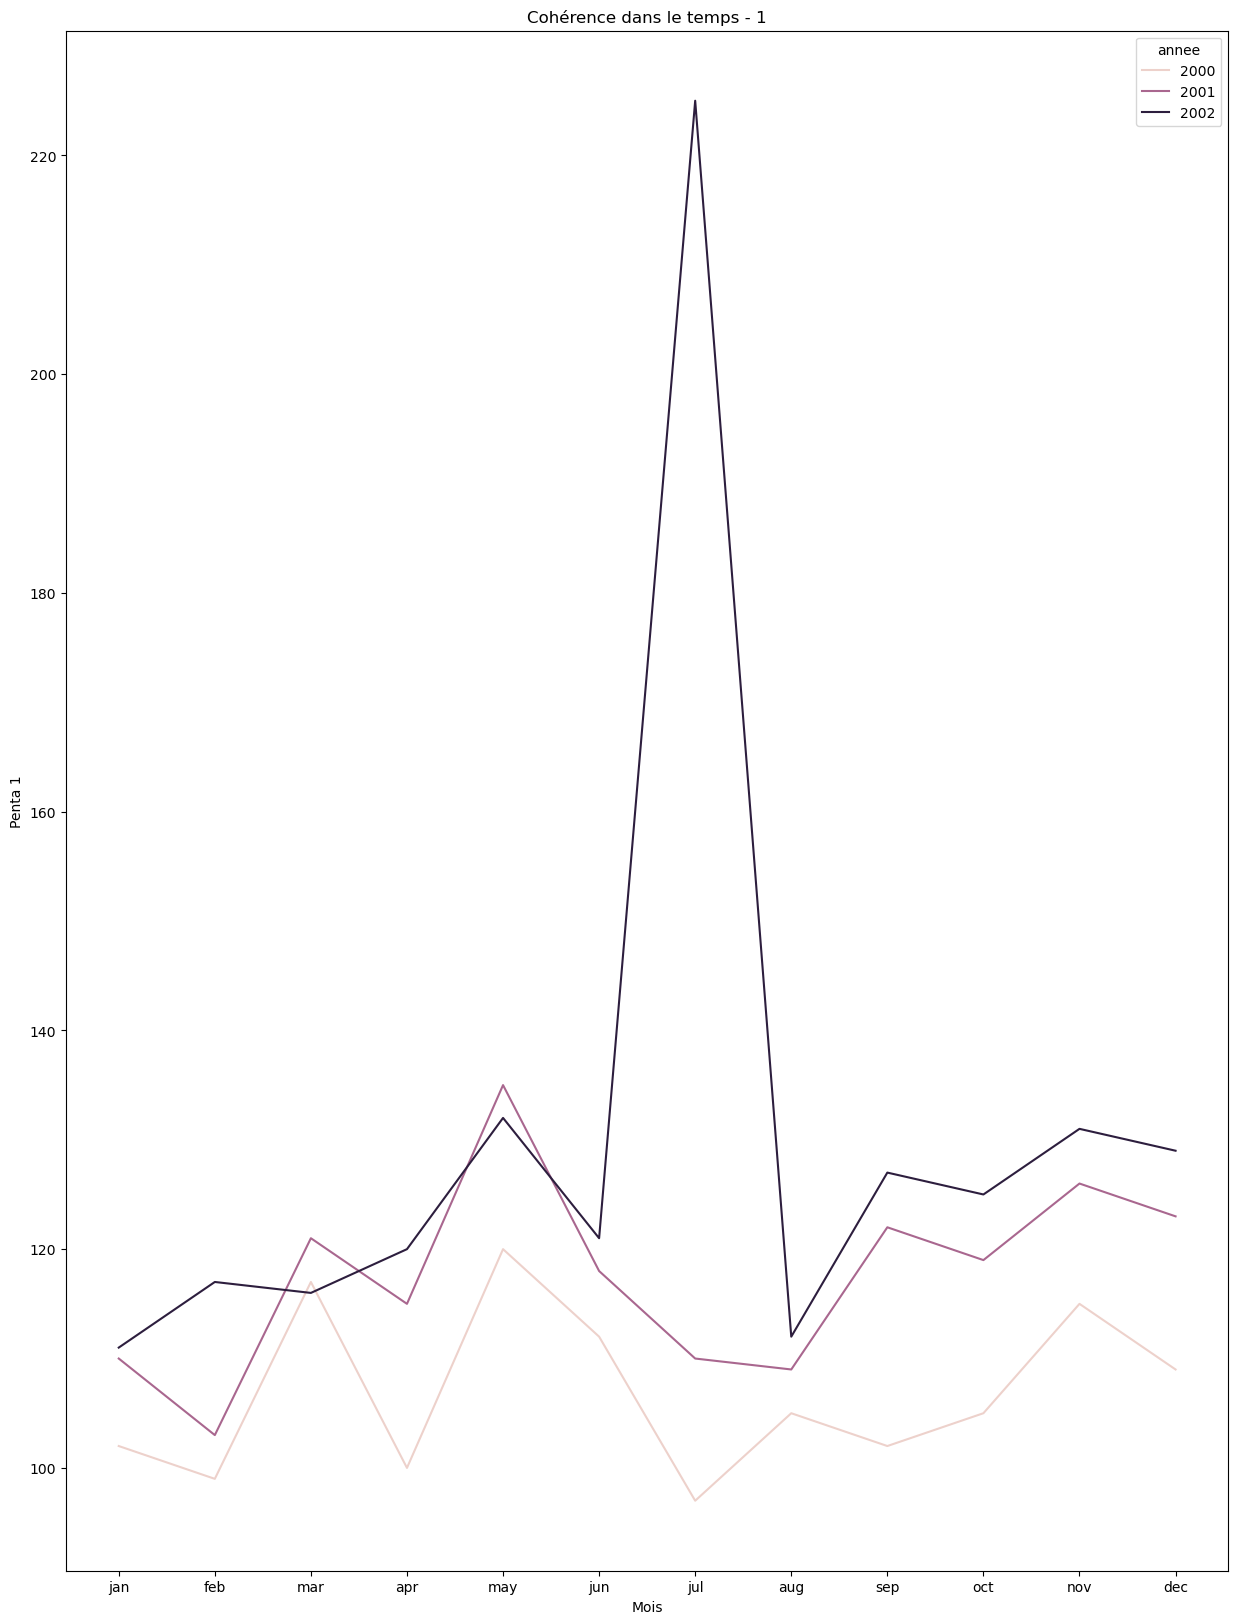

In [39]:
plt.figure(figsize=(15, 20))
sns.lineplot(data=fake_df_long, x="Mois", y="Penta 1", hue="annee")

plt.title("Cohérence dans le temps - 1")
plt.savefig("images/" + "coherence_dans_le_temps_0.png", bbox_inches='tight')
plt.show()

#### Augmentation en juillet et février

In [40]:
fake_df_1 = fake_df.drop(columns=['FOSA','indicateurs']).set_index("annee")

In [41]:
fake_df_1

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
annee,,,,,,,,,,,,
2000,102,99,117,100,120,112,97,105,102,105,115,109
2001,110,103,121,115,135,118,110,109,122,119,126,123
2002,111,117,116,120,132,121,225,112,127,125,131,129


In [42]:
fake_df_1.loc["moyenne"] = fake_df_1.mean()

In [43]:
fake_df_1

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
annee,,,,,,,,,,,,
2000,102.000000,99.000000,117.0,100.000000,120.0,112.0,97.0,105.000000,102.0,105.000000,115.0,109.000000
2001,110.000000,103.000000,121.0,115.000000,135.0,118.0,110.0,109.000000,122.0,119.000000,126.0,123.000000
2002,111.000000,117.000000,116.0,120.000000,132.0,121.0,225.0,112.000000,127.0,125.000000,131.0,129.000000
moyenne,107.666667,106.333333,118.0,111.666667,129.0,117.0,144.0,108.666667,117.0,116.333333,124.0,120.333333


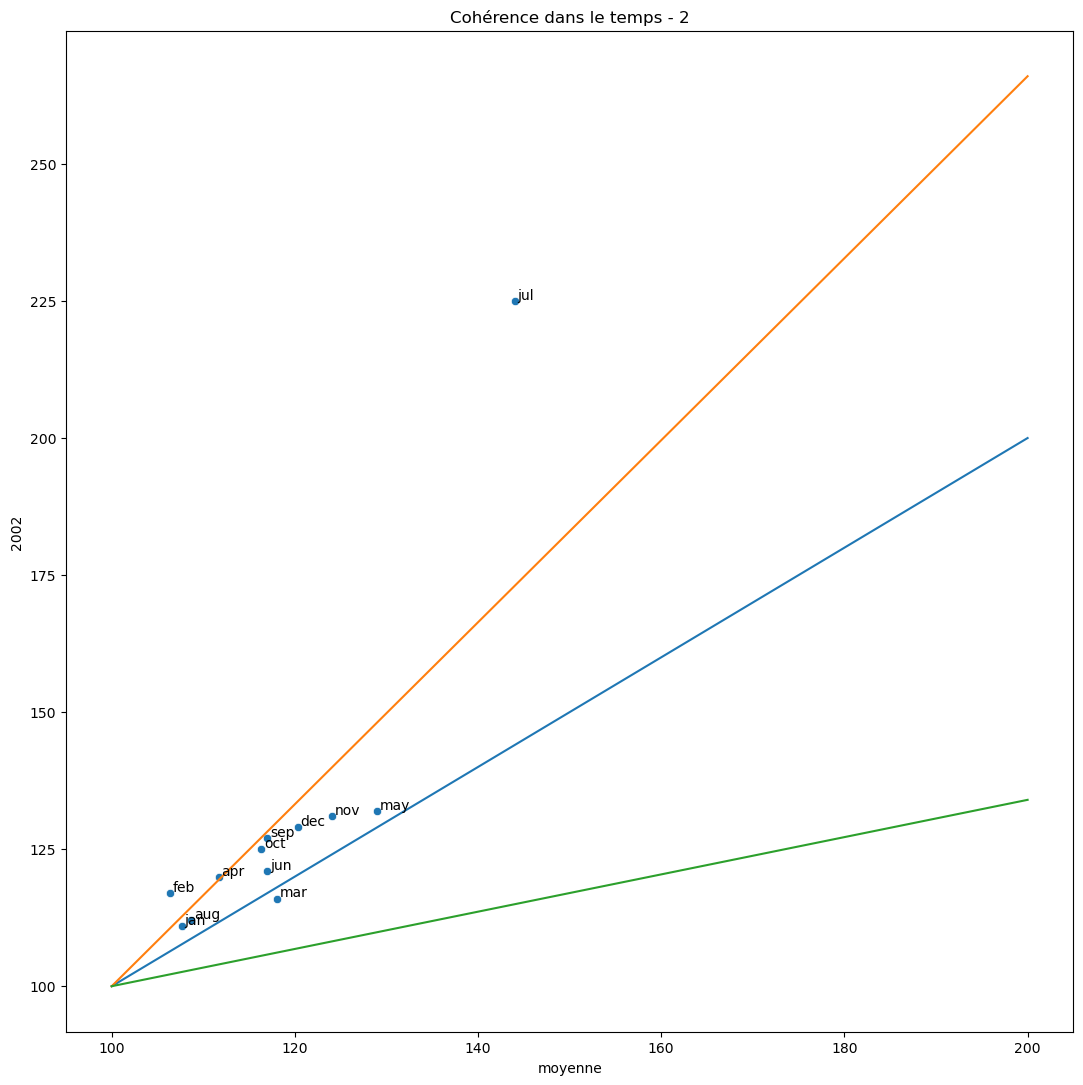

In [44]:
plt.figure(figsize=(13, 13))
sns.scatterplot(x=fake_df_1.loc["moyenne"], y=fake_df_1.loc[2002])
for i in range(len(fake_df_1.columns)):
    plt.text(x=fake_df_1.loc["moyenne"].iloc[i] + 0.3, y=fake_df_1.loc[2002].iloc[i] + 0.3, s=list(fake_df_1.columns)[i])
    #plt.text(x=fake_df_1.loc["moyenne"][i] + 0.3, y=fake_df_1.loc[2002][i] + 0.3, s=list(fake_df_1.columns)[i]) #iloc[i] a ete preferre a [i]

#explication: plt.plot([Ax, Bx], [Ay, by]) trace une droite avec A(Ax, Ay)  et B(Bx, By) comme extremites
plt.plot([100, 200],[100, 200]) #Premiere bissectrice
plt.plot([100, 200],[100, 266]) #Premiere bissectrice + 30%
plt.plot([100, 200],[100, 134]) #Premiere bissectrice - 30%

plt.title("Cohérence dans le temps - 2")
plt.savefig("images/" + "coherence_dans_le_temps.png", bbox_inches='tight')
plt.show()

#### Confirmation des augmentations en juillet et février.

#### Coherence interne   

##### a Les doses doivent baisser au sein des cohorte pour chaque antigène le penta par exemple (penta_1 >= penta_2 >= penta_3 )   
##### b Les doses doivent baisser au sein des cohorte pour chaque antigène le penta par exemple (polio_1 >= polio_2 >= polio_3 )   
##### c Les doses doivent baisser au sein des cohorte pour chaque antigène le penta par exemple (pcv13_1 >= pcv13_2 >= pcv13_3 )   
##### d Les doses doivent baisser au sein des cohorte pour chaque antigène le penta par exemple (rota_1 >= rota_2 )   

_

##### 1 Entre les vaccins administrés au même moment  
##### 2 Entre les quantités admlnistrés et les stocks restants       
##### 3 Entre les fiches de mouvements de stock et le stock physique     

### Cohérence interne

In [45]:
fosa = ['CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1']
date = ['01/01/2010', '01/02/2010', '01/03/2010', '01/04/2010', '01/05/2010', '01/06/2010', 
        '01/07/2010', '01/08/2010', '01/09/2010', '01/10/2010', '01/11/2010', '01/12/2010']
penta_1=[17,19,21,15,20,19,20,16, 22, 15,17, 21]
polio_1=[17,19,21,15,20,19,20,16, 22, 15,17, 21]
pcv13_1=[17,19,21,15,20,19,20,16, 22, 15,17, 21]
rota_1=[17,19,21,15,20,19,20,16, 22, 15,17, 21]

penta_2=[15,17,18,15,17,18,16,15,20, 12, 16, 20]
polio_2=[15,17,18,15,17,18,16,15,20, 12, 16, 20]
pcv13_2=[15,17,18,15,17,18,16,15,20, 12, 16, 20]
rota_2=[15,17,18,15,17,18,16,15,20, 12, 16, 20]

penta_3=[12, 11, 16, 15, 16, 14, 17, 12, 14, 19, 13, 17]
polio_3=[12, 11, 16, 15, 16, 14, 17, 12, 14, 19, 13, 17]
pcv13_3=[12, 11, 16, 15, 16, 14, 17, 12, 14, 19, 13, 17]
vpi_1=[12, 11, 16, 15, 16, 14, 17, 12, 14, 19, 13, 17]

rr=[27, 25, 21, 20, 17, 15, 20, 18, 18, 19, 22, 20]
fj=[27, 25, 21, 20, 17, 15, 20, 18, 18, 19, 22, 20]


In [46]:
fake_df_2 = pd.DataFrame({"FOSA":fosa,
                       "date":date,
                       "Penta 1":penta_1,
                       "Polio 1":polio_1,
                       "PCV13 1":pcv13_1,
                       "rota 1":rota_1,
                       "Penta 2":penta_2,
                       "Polio 2":polio_2,
                       "PCV13 2":pcv13_2,
                       "rota 2":rota_2,
                       "Penta 3":penta_3,
                       "Polio 3":polio_3,
                       "PCV13 3":pcv13_3,
                       "VPI":vpi_1, 
                       "RR":rr,
                       "FJ":fj})

In [47]:
fake_df_2

,FOSA,date,Penta 1,Polio 1,PCV13 1,rota 1,Penta 2,Polio 2,PCV13 2,rota 2,Penta 3,Polio 3,PCV13 3,VPI,RR,FJ
0,CSI 1,01/01/2010,17,17,17,17,15,15,15,15,12,12,12,12,27,27
1,CSI 1,01/02/2010,19,19,19,19,17,17,17,17,11,11,11,11,25,25
2,CSI 1,01/03/2010,21,21,21,21,18,18,18,18,16,16,16,16,21,21
3,CSI 1,01/04/2010,15,15,15,15,15,15,15,15,15,15,15,15,20,20
4,CSI 1,01/05/2010,20,20,20,20,17,17,17,17,16,16,16,16,17,17
5,CSI 1,01/06/2010,19,19,19,19,18,18,18,18,14,14,14,14,15,15
6,CSI 1,01/07/2010,20,20,20,20,16,16,16,16,17,17,17,17,20,20
7,CSI 1,01/08/2010,16,16,16,16,15,15,15,15,12,12,12,12,18,18
8,CSI 1,01/09/2010,22,22,22,22,20,20,20,20,14,14,14,14,18,18
9,CSI 1,01/10/2010,15,15,15,15,12,12,12,12,19,19,19,19,19,19


In [48]:
fake_df_2.to_excel('data/fake_df_2.xlsx')

### 1 Entre les vaccins administrés au même moment

In [49]:
#critere_1 = penta_1 == polio_1 == pcv13_1
#critere_2 = penta_2 == polio_2 == pcv13_2 == rota1
#critere_3 = penta_3 == polio_3 == pcv13_3 == rota2 == vpi
#critere_4 = rr == fj

In [50]:
fake_df_2['critere_1'] = (fake_df_2['Penta 1'] == fake_df_2['Polio 1']) & \
(fake_df_2['PCV13 1'] == fake_df_2['Polio 1']) & \
(fake_df_2['Penta 1'] == fake_df_2['Polio 1']) & \
(fake_df_2['rota 1'] == fake_df_2['Penta 1']) & \
(fake_df_2['rota 1'] == fake_df_2['Polio 1']) & \
(fake_df_2['rota 1'] == fake_df_2['PCV13 1'])

In [51]:
fake_df_2['critere_2'] = (fake_df_2['Penta 2'] == fake_df_2['Polio 2']) & \
(fake_df_2['PCV13 2'] == fake_df_2['Polio 2']) & \
(fake_df_2['Penta 2'] == fake_df_2['PCV13 2']) & \
(fake_df_2['rota 2'] == fake_df_2['Penta 2']) & \
(fake_df_2['rota 2'] == fake_df_2['Polio 2']) & \
(fake_df_2['rota 2'] == fake_df_2['PCV13 2'])

In [52]:
fake_df_2['critere_3'] = (fake_df_2['Penta 3'] == fake_df_2['Polio 3']) & \
(fake_df_2['PCV13 3'] == fake_df_2['Polio 3']) & \
(fake_df_2['Penta 3'] == fake_df_2['PCV13 3']) & \
(fake_df_2['VPI'] == fake_df_2['Penta 3']) & \
(fake_df_2['VPI'] == fake_df_2['Polio 3']) & \
(fake_df_2['VPI'] == fake_df_2['PCV13 3']) 

In [53]:
fake_df_2['critere_4'] = (fake_df_2['RR'] == fake_df_2['FJ'])

In [54]:
21+18+16

55

In [55]:
# Alternative a cette succession de comparaisons logiques

In [56]:
def get_first_contact_criteria(s):
    first_contact = [s['Penta 1'], s['Polio 1'], s['PCV13 1'], s['rota 1']]
    return all(x == first_contact[0] for x in first_contact)

In [57]:
# HELP FUNCTION

In [58]:
# first_criteria = fake_df_2.apply(lambda row: get_first_contact_criteria(row), axis=1)

In [59]:
# fake_df_2["fake"] = first_criteria

In [60]:
# a Les doses doivent baisser au sein des cohorte pour chaque antigène le penta par exemple (penta_1 >= penta_2 >= penta_3 )
# b Les doses doivent baisser au sein des cohorte pour chaque antigène la polio par exemple (polio_1 >= polio_2 >= polio_3 )
# c Les doses doivent baisser au sein des cohorte pour chaque antigène le pcv13 par exemple (pcv13_1 >= pcv13_2 >= pcv13_3 )
# d Les doses doivent baisser au sein des cohorte pour chaque antigène le rota par exemple (rota_1 >= rota_2 )

In [61]:
fake_df_2[("critere_a")] = (fake_df_2[("Penta 1")] >= fake_df_2[("Penta 2")]) & (fake_df_2[("Penta 2")] >= fake_df_2[("Penta 3")])

In [62]:
fake_df_2[("critere_b")] = (fake_df_2[("Polio 1")] >= fake_df_2[("Polio 2")]) & (fake_df_2[("Polio 2")] >= fake_df_2[("Polio 3")])

In [63]:
fake_df_2[("critere_c")] = (fake_df_2[("PCV13 1")] >= fake_df_2[("PCV13 2")]) & (fake_df_2[("PCV13 2")] >= fake_df_2[("PCV13 3")])

In [64]:
fake_df_2[("critere_d")] = fake_df_2[("rota 1")] >= fake_df_2[("rota 2")]

In [65]:
fake_df_2

,FOSA,date,Penta 1,Polio 1,PCV13 1,rota 1,Penta 2,Polio 2,PCV13 2,rota 2,...,RR,FJ,critere_1,critere_2,critere_3,critere_4,critere_a,critere_b,critere_c,critere_d
0,CSI 1,01/01/2010,17,17,17,17,15,15,15,15,...,27,27,True,True,True,True,True,True,True,True
1,CSI 1,01/02/2010,19,19,19,19,17,17,17,17,...,25,25,True,True,True,True,True,True,True,True
2,CSI 1,01/03/2010,21,21,21,21,18,18,18,18,...,21,21,True,True,True,True,True,True,True,True
3,CSI 1,01/04/2010,15,15,15,15,15,15,15,15,...,20,20,True,True,True,True,True,True,True,True
4,CSI 1,01/05/2010,20,20,20,20,17,17,17,17,...,17,17,True,True,True,True,True,True,True,True
5,CSI 1,01/06/2010,19,19,19,19,18,18,18,18,...,15,15,True,True,True,True,True,True,True,True
6,CSI 1,01/07/2010,20,20,20,20,16,16,16,16,...,20,20,True,True,True,True,False,False,False,True
7,CSI 1,01/08/2010,16,16,16,16,15,15,15,15,...,18,18,True,True,True,True,True,True,True,True
8,CSI 1,01/09/2010,22,22,22,22,20,20,20,20,...,18,18,True,True,True,True,True,True,True,True
9,CSI 1,01/10/2010,15,15,15,15,12,12,12,12,...,19,19,True,True,True,True,False,False,False,True


### 2 Entre les quantités admlnistrés et les stocks restants

In [66]:
#doseS_administreeS = penta_1 + penta_2 + penta_3
#critere_5 = doses_administrees <= dose_utilisees

In [67]:
fake_df_2["DA_penta"] = fake_df_2["Penta 1"] + fake_df_2["Penta 2"] +fake_df_2["Penta 3"]

In [68]:
fake_df_2["DA_polio"] = fake_df_2["Polio 1"] + fake_df_2["Polio 2"] +fake_df_2["Polio 3"]

In [69]:
fake_df_2["DA_PCV13"] = fake_df_2["PCV13 1"] + fake_df_2["PCV13 2"] +fake_df_2["PCV13 3"]

In [70]:
fake_df_2["DA_rota"] = fake_df_2["rota 1"] + fake_df_2["rota 2"]

In [71]:
fake_df_2["DA_VPI"] = fake_df_2["VPI"]

In [72]:
fake_df_2["DA_RR"] = fake_df_2["RR"]

In [73]:
fake_df_2["DA_FJ"] = fake_df_2["FJ"]

In [74]:
fake_df_2

,FOSA,date,Penta 1,Polio 1,PCV13 1,rota 1,Penta 2,Polio 2,PCV13 2,rota 2,...,critere_b,critere_c,critere_d,DA_penta,DA_polio,DA_PCV13,DA_rota,DA_VPI,DA_RR,DA_FJ
0,CSI 1,01/01/2010,17,17,17,17,15,15,15,15,...,True,True,True,44,44,44,32,12,27,27
1,CSI 1,01/02/2010,19,19,19,19,17,17,17,17,...,True,True,True,47,47,47,36,11,25,25
2,CSI 1,01/03/2010,21,21,21,21,18,18,18,18,...,True,True,True,55,55,55,39,16,21,21
3,CSI 1,01/04/2010,15,15,15,15,15,15,15,15,...,True,True,True,45,45,45,30,15,20,20
4,CSI 1,01/05/2010,20,20,20,20,17,17,17,17,...,True,True,True,53,53,53,37,16,17,17
5,CSI 1,01/06/2010,19,19,19,19,18,18,18,18,...,True,True,True,51,51,51,37,14,15,15
6,CSI 1,01/07/2010,20,20,20,20,16,16,16,16,...,False,False,True,53,53,53,36,17,20,20
7,CSI 1,01/08/2010,16,16,16,16,15,15,15,15,...,True,True,True,43,43,43,31,12,18,18
8,CSI 1,01/09/2010,22,22,22,22,20,20,20,20,...,True,True,True,56,56,56,42,14,18,18
9,CSI 1,01/10/2010,15,15,15,15,12,12,12,12,...,False,False,True,46,46,46,27,19,19,19


### 3 Entre les  mouvements de stock.

In [75]:
#critere_6 = stock_debut_mois == stock_fin_mois_passe
#critere_7 = (stock_debut_mois + doses_recues - doses_utilisees - doses_perdues) == stock_fin_mois

In [76]:
# Construction du fake data

In [77]:
fosa = ['CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1',
        'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1']

intrants = ['penta', 'penta', 'penta', 'polio', 'polio', 'polio', 
            'pcv13', 'pcv13', 'pcv13', 'rota', 'rota', 'rota',
            'vpi', 'vpi', 'vpi',  'rr', 'rr', 'rr', 'fj', 'fj', 'fj']
date =  ['01/01/2010', '01/02/2010', '01/03/2010', '01/01/2010', '01/02/2010', '01/03/2010', 
    '01/01/2010', '01/02/2010', '01/03/2010', '01/01/2010', '01/02/2010', '01/03/2010', 
    '01/01/2010', '01/02/2010', '01/03/2010', '01/01/2010', '01/02/2010', '01/03/2010', 
    '01/01/2010', '01/02/2010', '01/03/2010']

stock_debut_mois = [5,5,5,10,10,10,5,5,5,0,0,0,0,0,0,10,10,10,10,10,10]
doses_recues = [65,65,65,70,70,70,65,65,65,50,50,50,20,20,20,40,40,40,40,40,40]
doses_utilisees = [60,60,60,60,60,60,60,60,60,50,50,50,20,20,20,30,30,30,30,30,30]
doses_perdues = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
stock_fin_mois = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [78]:
fake_df_3 = pd.DataFrame({
                      'FOSA':fosa,
                        'intrants':intrants,
                       "date":date,
                       "stock_debut_mois":stock_debut_mois,
                       "doses_recues":doses_recues,
                       "doses_utilisees":doses_utilisees,
                       "doses_perdues":doses_perdues,
                       "stock_fin_mois":stock_fin_mois})

In [79]:
fake_df_3

,FOSA,intrants,date,stock_debut_mois,doses_recues,doses_utilisees,doses_perdues,stock_fin_mois
0,CSI 1,penta,01/01/2010,5,65,60,0,0
1,CSI 1,penta,01/02/2010,5,65,60,0,0
2,CSI 1,penta,01/03/2010,5,65,60,0,0
3,CSI 1,polio,01/01/2010,10,70,60,0,0
4,CSI 1,polio,01/02/2010,10,70,60,0,0
5,CSI 1,polio,01/03/2010,10,70,60,0,0
6,CSI 1,pcv13,01/01/2010,5,65,60,0,0
7,CSI 1,pcv13,01/02/2010,5,65,60,0,0
8,CSI 1,pcv13,01/03/2010,5,65,60,0,0
9,CSI 1,rota,01/01/2010,0,50,50,0,0


In [80]:
fake_df_3.to_excel('data/fake_df_3.xlsx')

In [81]:
fake_data_4 = fake_df_2[fake_df_2.index.isin([0,1,2])]

In [82]:
fake_data_4

,FOSA,date,Penta 1,Polio 1,PCV13 1,rota 1,Penta 2,Polio 2,PCV13 2,rota 2,...,critere_b,critere_c,critere_d,DA_penta,DA_polio,DA_PCV13,DA_rota,DA_VPI,DA_RR,DA_FJ
0,CSI 1,01/01/2010,17,17,17,17,15,15,15,15,...,True,True,True,44,44,44,32,12,27,27
1,CSI 1,01/02/2010,19,19,19,19,17,17,17,17,...,True,True,True,47,47,47,36,11,25,25
2,CSI 1,01/03/2010,21,21,21,21,18,18,18,18,...,True,True,True,55,55,55,39,16,21,21


In [83]:
# melt

In [84]:
fake_data_4 = fake_data_4[["FOSA", "date", "DA_penta", "DA_polio", "DA_PCV13", "DA_rota", "DA_VPI", "DA_RR", "DA_FJ"]]

In [85]:
fake_data_4

,FOSA,date,DA_penta,DA_polio,DA_PCV13,DA_rota,DA_VPI,DA_RR,DA_FJ
0,CSI 1,01/01/2010,44,44,44,32,12,27,27
1,CSI 1,01/02/2010,47,47,47,36,11,25,25
2,CSI 1,01/03/2010,55,55,55,39,16,21,21


In [86]:
fake_data_4 = fake_data_4.melt(id_vars=["FOSA", "date"], var_name="intrants", value_name="doses_administrees")

In [87]:
intrants_dict  = {
    "DA_penta":"penta",
    "DA_polio":"polio",
    "DA_PCV13":"pcv13",
    "DA_rota":"rota",
    "DA_VPI":"vpi",
    "DA_RR":"rr",
    "DA_FJ":"fj"    
}

In [88]:
type(fake_data_4)

pandas.core.frame.DataFrame

In [89]:
fake_data_4["intrants"] = fake_data_4["intrants"].map(intrants_dict)

In [90]:
fake_data_4

,FOSA,date,intrants,doses_administrees
0,CSI 1,01/01/2010,penta,44
1,CSI 1,01/02/2010,penta,47
2,CSI 1,01/03/2010,penta,55
3,CSI 1,01/01/2010,polio,44
4,CSI 1,01/02/2010,polio,47
5,CSI 1,01/03/2010,polio,55
6,CSI 1,01/01/2010,pcv13,44
7,CSI 1,01/02/2010,pcv13,47
8,CSI 1,01/03/2010,pcv13,55
9,CSI 1,01/01/2010,rota,32


In [91]:
fake_df_5 = pd.merge(fake_df_3, fake_data_4,  how='inner', left_on=["FOSA", "intrants", "date"], right_on = ["FOSA", "intrants", "date"])

In [92]:
fake_df_5

,FOSA,intrants,date,stock_debut_mois,doses_recues,doses_utilisees,doses_perdues,stock_fin_mois,doses_administrees
0,CSI 1,penta,01/01/2010,5,65,60,0,0,44
1,CSI 1,penta,01/02/2010,5,65,60,0,0,47
2,CSI 1,penta,01/03/2010,5,65,60,0,0,55
3,CSI 1,polio,01/01/2010,10,70,60,0,0,44
4,CSI 1,polio,01/02/2010,10,70,60,0,0,47
5,CSI 1,polio,01/03/2010,10,70,60,0,0,55
6,CSI 1,pcv13,01/01/2010,5,65,60,0,0,44
7,CSI 1,pcv13,01/02/2010,5,65,60,0,0,47
8,CSI 1,pcv13,01/03/2010,5,65,60,0,0,55
9,CSI 1,rota,01/01/2010,0,50,50,0,0,32


In [93]:
fake_df_5.dtypes

FOSA                  object
intrants              object
date                  object
stock_debut_mois       int64
doses_recues           int64
doses_utilisees        int64
doses_perdues          int64
stock_fin_mois         int64
doses_administrees     int64
dtype: object

In [94]:
#critere_5 = doses_administrees <= dose_utilisees
#critere_6 = stock_debut_mois == stock_fin_mois_passe
#critere_7 = (stock_debut_mois + doses_recues - doses_utilisees - doses_perdues) == stock_fin_mois

In [95]:
fake_df_5["critere_5"] = fake_df_5["doses_administrees"] <= fake_df_5["doses_utilisees"] 

In [96]:
fake_df_5

,FOSA,intrants,date,stock_debut_mois,doses_recues,doses_utilisees,doses_perdues,stock_fin_mois,doses_administrees,critere_5
0,CSI 1,penta,01/01/2010,5,65,60,0,0,44,True
1,CSI 1,penta,01/02/2010,5,65,60,0,0,47,True
2,CSI 1,penta,01/03/2010,5,65,60,0,0,55,True
3,CSI 1,polio,01/01/2010,10,70,60,0,0,44,True
4,CSI 1,polio,01/02/2010,10,70,60,0,0,47,True
5,CSI 1,polio,01/03/2010,10,70,60,0,0,55,True
6,CSI 1,pcv13,01/01/2010,5,65,60,0,0,44,True
7,CSI 1,pcv13,01/02/2010,5,65,60,0,0,47,True
8,CSI 1,pcv13,01/03/2010,5,65,60,0,0,55,True
9,CSI 1,rota,01/01/2010,0,50,50,0,0,32,True


In [97]:
intrants_list = ["penta", "polio", "pcv13", "rota", "vpi", "rr", "fj"]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stock_fin_mois_passe"] = df["stock_fin_mois"].shift(1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.stock_debut_mois = df.stock_debut_mois.astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

--------
                           critere_5  critere_6  critere_7
FOSA  date       intrants                                 
CSI 1 01/01/2010 penta          True      False      False
      01/02/2010 penta          True      False      False
      01/03/2010 penta          True      False      False


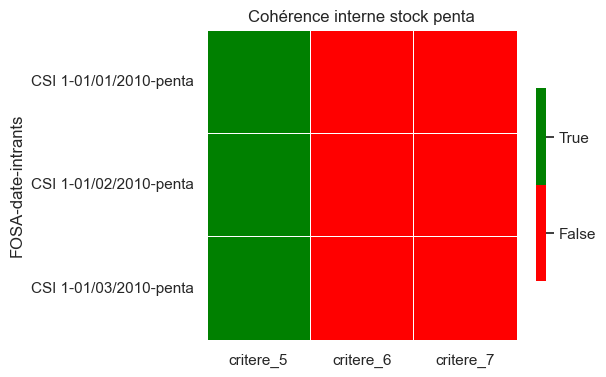

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stock_fin_mois_passe"] = df["stock_fin_mois"].shift(1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.stock_debut_mois = df.stock_debut_mois.astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

--------
                           critere_5  critere_6  critere_7
FOSA  date       intrants                                 
CSI 1 01/01/2010 polio          True      False      False
      01/02/2010 polio          True      False      False
      01/03/2010 polio          True      False      False


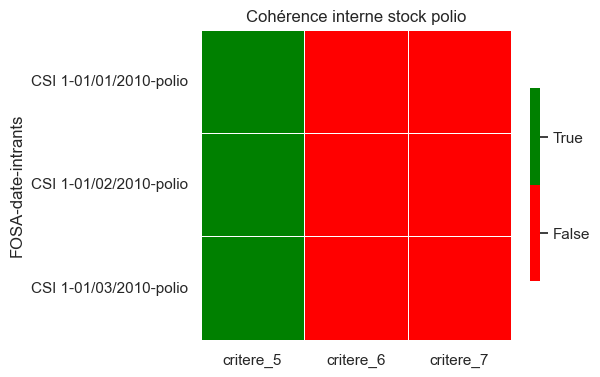

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stock_fin_mois_passe"] = df["stock_fin_mois"].shift(1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.stock_debut_mois = df.stock_debut_mois.astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

--------
                           critere_5  critere_6  critere_7
FOSA  date       intrants                                 
CSI 1 01/01/2010 pcv13          True      False      False
      01/02/2010 pcv13          True      False      False
      01/03/2010 pcv13          True      False      False


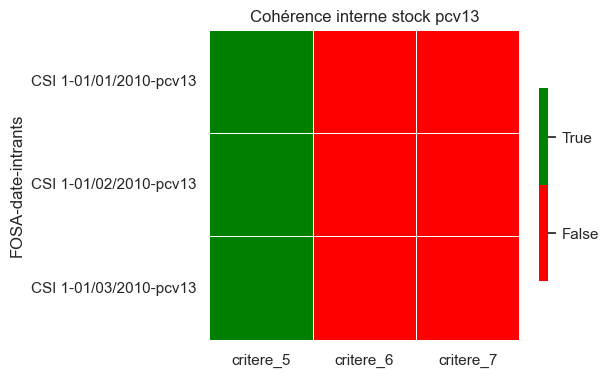

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stock_fin_mois_passe"] = df["stock_fin_mois"].shift(1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.stock_debut_mois = df.stock_debut_mois.astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

--------
                           critere_5  critere_6  critere_7
FOSA  date       intrants                                 
CSI 1 01/01/2010 rota           True      False       True
      01/02/2010 rota           True       True       True
      01/03/2010 rota           True       True       True


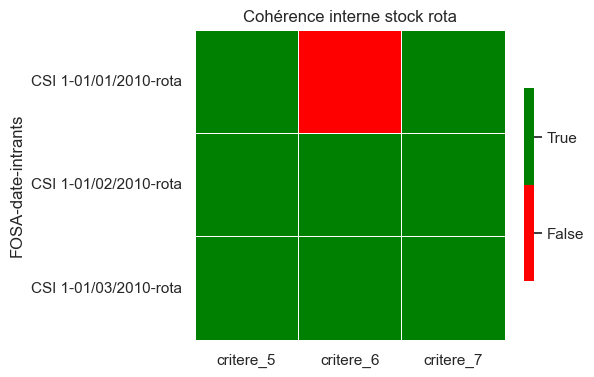

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stock_fin_mois_passe"] = df["stock_fin_mois"].shift(1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.stock_debut_mois = df.stock_debut_mois.astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

--------
                           critere_5  critere_6  critere_7
FOSA  date       intrants                                 
CSI 1 01/01/2010 vpi            True      False       True
      01/02/2010 vpi            True       True       True
      01/03/2010 vpi            True       True       True


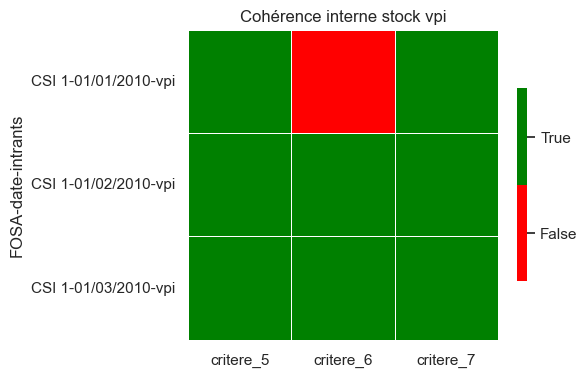

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stock_fin_mois_passe"] = df["stock_fin_mois"].shift(1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.stock_debut_mois = df.stock_debut_mois.astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

--------
                           critere_5  critere_6  critere_7
FOSA  date       intrants                                 
CSI 1 01/01/2010 rr             True      False      False
      01/02/2010 rr             True      False      False
      01/03/2010 rr             True      False      False


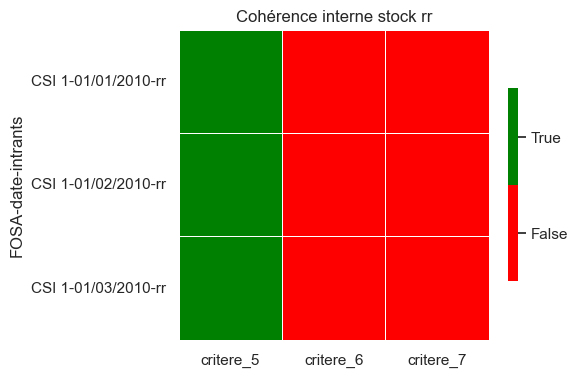

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stock_fin_mois_passe"] = df["stock_fin_mois"].shift(1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.stock_debut_mois = df.stock_debut_mois.astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15276\2695270120.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

--------
                           critere_5  critere_6  critere_7
FOSA  date       intrants                                 
CSI 1 01/01/2010 fj             True      False      False
      01/02/2010 fj             True      False      False
      01/03/2010 fj             True      False      False


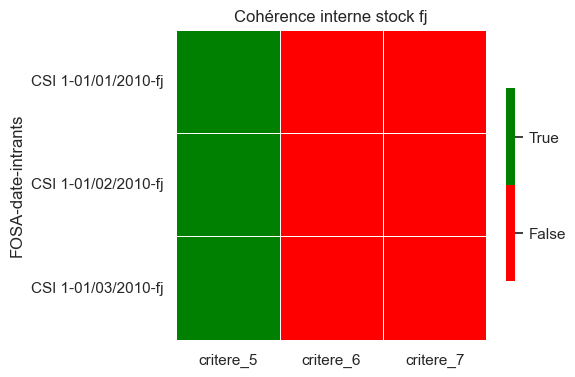

In [98]:
for i in intrants_list :
    df = fake_df_5[fake_df_5["intrants"] == i]
    #print(df)
    df["stock_fin_mois_passe"] = df["stock_fin_mois"].shift(1)
    df.stock_debut_mois = df.stock_debut_mois.astype(float)    

    #critere_6 = stock_debut_mois == stock_fin_mois_passe
    df["critere_6"] = df["stock_fin_mois_passe"] == df["stock_debut_mois"]
    df["critere_7"] = (df["stock_debut_mois"] + df["doses_recues"] - df["doses_utilisees"] - df["doses_perdues"]) == df["stock_fin_mois"]
    #critere_7 = (stock_debut_mois + doses_recues - doses_utilisees - doses_perdues) == stock_fin_mois
    df = df[["FOSA", "intrants", "date", "stock_debut_mois", "stock_fin_mois_passe", "critere_5", "critere_6", "critere_7"]]
    df = df[["FOSA", "intrants", "date", "critere_5", "critere_6", "critere_7"]]
    df = df.set_index(["FOSA", "date", "intrants"])

    print("--------")
    print(df)


    from matplotlib.colors import LinearSegmentedColormap
    sns.set()

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(5, 5))

    
    colors = ["red", "green"] 
    cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
    
    # Draw the heatmap with the mask and correct aspect ratio
    _ = sns.heatmap(df, cmap=cmap,square=True,  linewidths=.5, cbar_kws={"shrink": .5})

    # Set the colorbar labels
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([0.25,0.75])
    colorbar.set_ticklabels(['False', 'True'])
    plt.title("Cohérence interne stock " + i)
    plt.savefig("images/" + i + "_crit_5_6_7.png", bbox_inches='tight')
    plt.show()

## Heatmap

In [99]:
cols_2 = fake_df_2.columns
cols_2

Index(['FOSA', 'date', 'Penta 1', 'Polio 1', 'PCV13 1', 'rota 1', 'Penta 2',
       'Polio 2', 'PCV13 2', 'rota 2', 'Penta 3', 'Polio 3', 'PCV13 3', 'VPI',
       'RR', 'FJ', 'critere_1', 'critere_2', 'critere_3', 'critere_4',
       'critere_a', 'critere_b', 'critere_c', 'critere_d', 'DA_penta',
       'DA_polio', 'DA_PCV13', 'DA_rota', 'DA_VPI', 'DA_RR', 'DA_FJ'],
      dtype='object')

In [100]:
cols_criteria = ['FOSA', 'date', 'critere_1', 'critere_2', 'critere_3', 'critere_4','critere_a', 'critere_b', 'critere_c', 'critere_d']

In [101]:
df_heatmap = fake_df_2[cols_criteria].set_index(["FOSA", "date"])

In [102]:
df_heatmap

critere_1  critere_2  critere_3  critere_4  critere_a  \
FOSA  date                                                                
CSI 1 01/01/2010       True       True       True       True       True   
      01/02/2010       True       True       True       True       True   
      01/03/2010       True       True       True       True       True   
      01/04/2010       True       True       True       True       True   
      01/05/2010       True       True       True       True       True   
      01/06/2010       True       True       True       True       True   
      01/07/2010       True       True       True       True      False   
      01/08/2010       True       True       True       True       True   
      01/09/2010       True       True       True       True       True   
      01/10/2010       True       True       True       True      False   
      01/11/2010       True       True       True       True       True   
      01/12/2010       True       True       True       True       True   

                  critere_b  critere_c  critere_d  
FOSA  date                                         
CSI 1 01/01/2010       True       True       True  
      01/02/2010       True       True       True  
      01/03/2010       True       True       True  
      01/04/2010       True       True       True  
      01/05/2010       True       True       True  
      01/06/2010       True       True       True  
      01/07/2010      False      False       True  
      01/08/2010       True       True       True  
      01/09/2010       True       True       True  
      01/10/2010      False      False       True  
      01/11/2010       True       True       True  
      01/12/2010       True       True       True

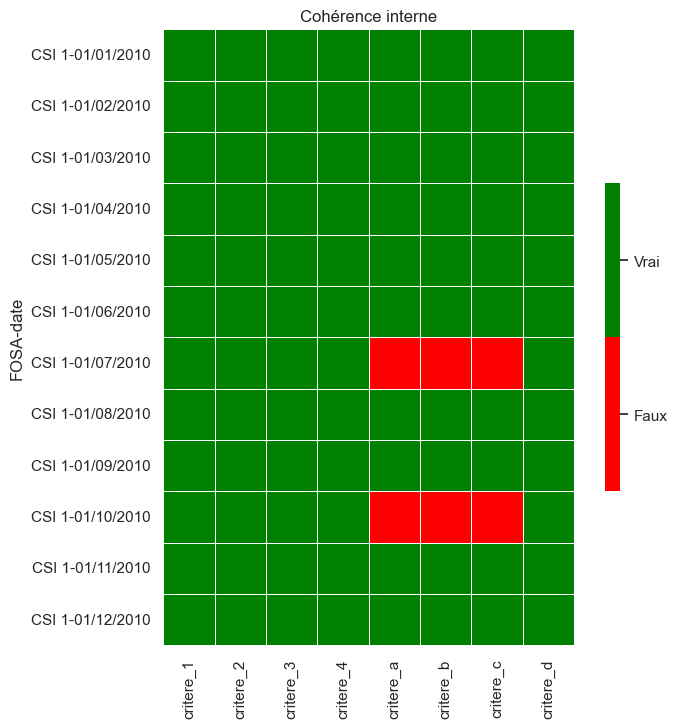

In [103]:
from matplotlib.colors import LinearSegmentedColormap
sns.set()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

colors = ["red", "green"] 
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))


# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(df_heatmap, cmap=cmap,square=True,  linewidths=.5, cbar_kws={"shrink": .5})
#_.set_yticklabels(_.get_yticklabels(), rotation=90)

# Set the colorbar labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(['Faux', 'Vrai'])

plt.title("Cohérence interne")
plt.savefig("images/" + "crit_1_2_3_4_a_b_c_d.png")
plt.show()

The SettingWithCopyWarning was created to flag potentially confusing "chained" assignments, such as the following, which does not always work as    expected, particularly when the first selection returns a copy    

df[df['A'] > 2]['B'] = new_val  
new_val not set in df

The warning offers a suggestion to rewrite as follows:   
df.loc[df['A'] > 2, 'B'] = new_val


### Consommation moyenne mensuelle
#### Moyenne de doses utilisees sur les 3 derniers mois consecutifs

In [104]:
fosa = ['CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1', 'CSI 1']

intrants = ['penta', 'penta', 'penta', 'penta', 'penta', 'penta', 
            'penta', 'penta', 'penta', 'penta', 'penta', 'penta']
date =  ['01/01/2010', '01/02/2010', '01/03/2010', '01/04/2010', '01/05/2010', '01/06/2010', 
    '01/07/2010', '01/08/2010', '01/09/2010', '01/10/2010', '01/11/2010', '01/12/2010']

stock_debut_mois = [5,5,5,10,10,10,5,5,5,0,0,0]
doses_recues = [65,65,65,70,70,70,65,65,65,50,50,50]
doses_utilisees = [60,60,60,60,60,60,60,60,60,50,50,50]
doses_perdues = [0,0,0,0,0,0,0,0,0,0,0,0]
stock_fin_mois = [0,0,0,0,0,0,0,0,0,0,0,0]

In [105]:
fake_df_6 = pd.DataFrame({
                      'FOSA':fosa,
                        'intrants':intrants,
                       "date":date,
                       "stock_debut_mois":stock_debut_mois,
                       "doses_recues":doses_recues,
                       "doses_utilisees":doses_utilisees,
                       "doses_perdues":doses_perdues,
                       "stock_fin_mois":stock_fin_mois})

In [106]:
fake_df_6

,FOSA,intrants,date,stock_debut_mois,doses_recues,doses_utilisees,doses_perdues,stock_fin_mois
0,CSI 1,penta,01/01/2010,5,65,60,0,0
1,CSI 1,penta,01/02/2010,5,65,60,0,0
2,CSI 1,penta,01/03/2010,5,65,60,0,0
3,CSI 1,penta,01/04/2010,10,70,60,0,0
4,CSI 1,penta,01/05/2010,10,70,60,0,0
5,CSI 1,penta,01/06/2010,10,70,60,0,0
6,CSI 1,penta,01/07/2010,5,65,60,0,0
7,CSI 1,penta,01/08/2010,5,65,60,0,0
8,CSI 1,penta,01/09/2010,5,65,60,0,0
9,CSI 1,penta,01/10/2010,0,50,50,0,0


In [107]:
fake_df_6["CMM"] = fake_df_6["doses_utilisees"].rolling(3).mean()

In [108]:
fake_df_6

,FOSA,intrants,date,stock_debut_mois,doses_recues,doses_utilisees,doses_perdues,stock_fin_mois,CMM
0,CSI 1,penta,01/01/2010,5,65,60,0,0,NaN
1,CSI 1,penta,01/02/2010,5,65,60,0,0,NaN
2,CSI 1,penta,01/03/2010,5,65,60,0,0,60.000000
3,CSI 1,penta,01/04/2010,10,70,60,0,0,60.000000
4,CSI 1,penta,01/05/2010,10,70,60,0,0,60.000000
5,CSI 1,penta,01/06/2010,10,70,60,0,0,60.000000
6,CSI 1,penta,01/07/2010,5,65,60,0,0,60.000000
7,CSI 1,penta,01/08/2010,5,65,60,0,0,60.000000
8,CSI 1,penta,01/09/2010,5,65,60,0,0,60.000000
9,CSI 1,penta,01/10/2010,0,50,50,0,0,56.666667


https://www.reddit.com/r/AskStatistics/comments/m4en99/modified_zscore_question/?rdt=34916

https://www.statology.org/modified-z-score/

https://medium.com/@joaopedroferrazrodrigues/outliers-make-us-go-mad-univariate-outlier-detection-b3a72f1ea8c7

Le calcul dans votre commentaire tente de calculer une version approximative "robuste" d'un score z, mais avec un centre basé sur l'utilisation de la médiane au lieu de la moyenne et un écart basé sur l'écart médian absolu par rapport à la médiane au lieu de la norme. déviation.

Pour une population symétrique à moyenne finie, la moyenne et la médiane sont égales ; mais la médiane résiste aux valeurs aberrantes flagrantes. Si votre distribution est contaminée par d'importantes valeurs aberrantes (provenant d'un processus autre que les données principales - un bon exemple serait celui où les chiffres sont affectés par une erreur de frappe occasionnelle, comme appuyer deux fois sur une touche en tapant un nombre), cela peut créer un Il y a beaucoup de sens à se prémunir contre l’impact de cette contamination.

Cependant, l'écart médian absolu par rapport à la médiane est généralement différent d'un écart type et (essentiellement toujours) plus petit que celui-ci. Si vous souhaitez l'utiliser pour créer un score z, vous devez le mettre à l'échelle pour que le résultat soit en moyenne proche de la taille du score z en utilisant l'écart type.

Un choix courant consiste à supposer que sans valeurs aberrantes, la distribution serait comme une distribution normale, auquel cas dans de grands échantillons, le MAD sera environ 2/3 aussi grand* que l'écart type le serait sans valeurs aberrantes.

Parce que vous divisez par MAD qui correspond à environ 2/3 de σ, vous devez multiplier (y-médiane)/MAD par environ 2/3 pour revenir à environ un score z.

Lorsque les échantillons sont grands et que vous avez affaire à un échantillonnage à partir de distributions normales, ce score z se retrouve généralement très proche du score z réel.

* (plus précisément 0,6745 -- c'est le quartile supérieur d'une normale standard)